In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')


In [4]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def pie_chart(df, feature, output):
    survived = df[df[output] == 1][feature].value_counts()
    dead = df[df[output] == 0][feature].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    survived.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'Survived = 1')
    axes[0].set_ylabel('')

    dead.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Survived = 0')
    axes[1].set_ylabel('')

    fig.suptitle(f'Pie chart for {feature} data', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


In [7]:
def get_survived_counts(df, feature, output):
    survived_counts = df[df[output] == 1][feature].value_counts().to_dict()
    return survived_counts

## EDA

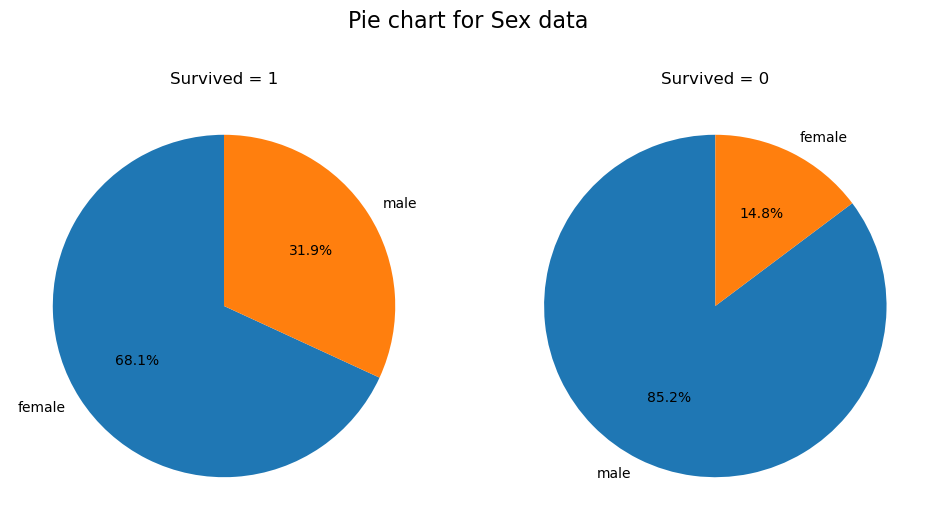

In [8]:
pie_chart(df=train_data, feature='Sex', output='Survived')

In [9]:
get_survived_counts(df=train_data, feature='Sex', output='Survived')

{'female': 233, 'male': 109}

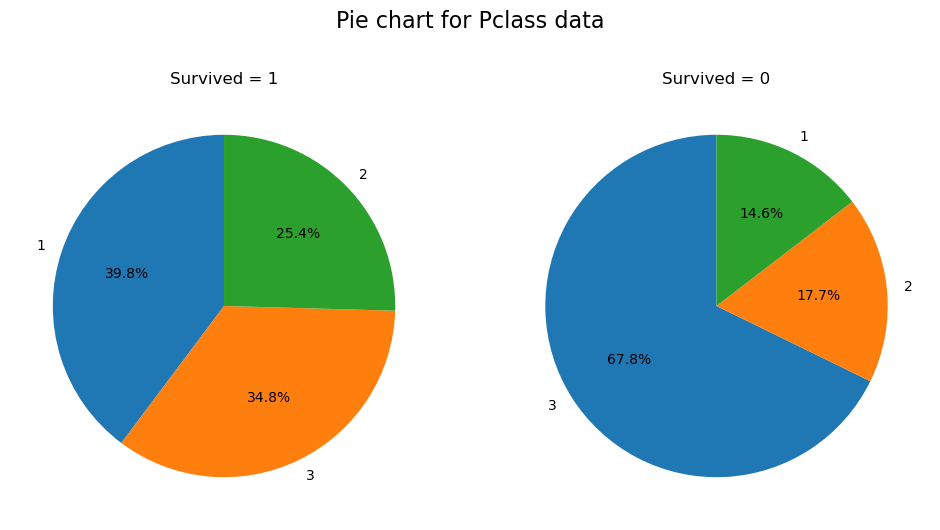

In [10]:
pie_chart(df=train_data, feature='Pclass', output='Survived')

In [11]:
get_survived_counts(df=train_data, feature='Pclass', output='Survived')

{1: 136, 3: 119, 2: 87}

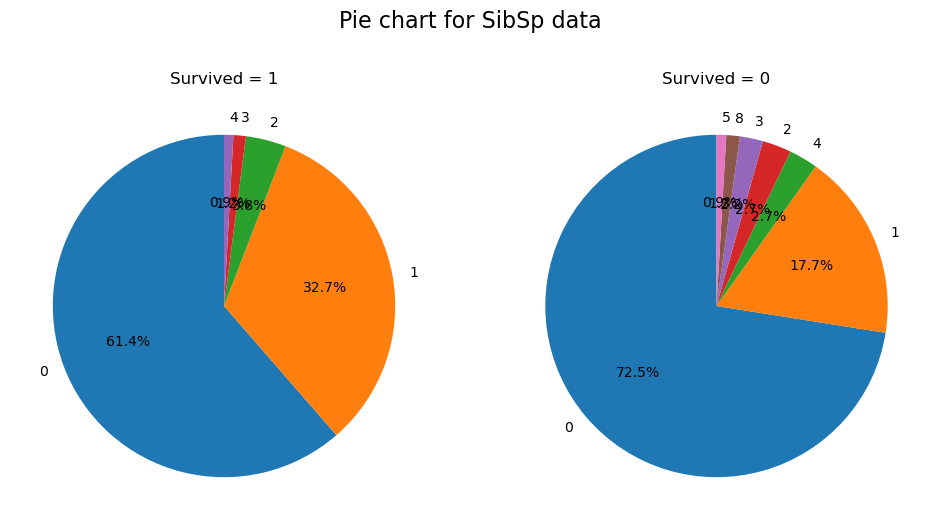

In [12]:
pie_chart(df=train_data, feature='SibSp', output='Survived')

In [13]:
get_survived_counts(df=train_data, feature='SibSp', output='Survived')

{0: 210, 1: 112, 2: 13, 3: 4, 4: 3}

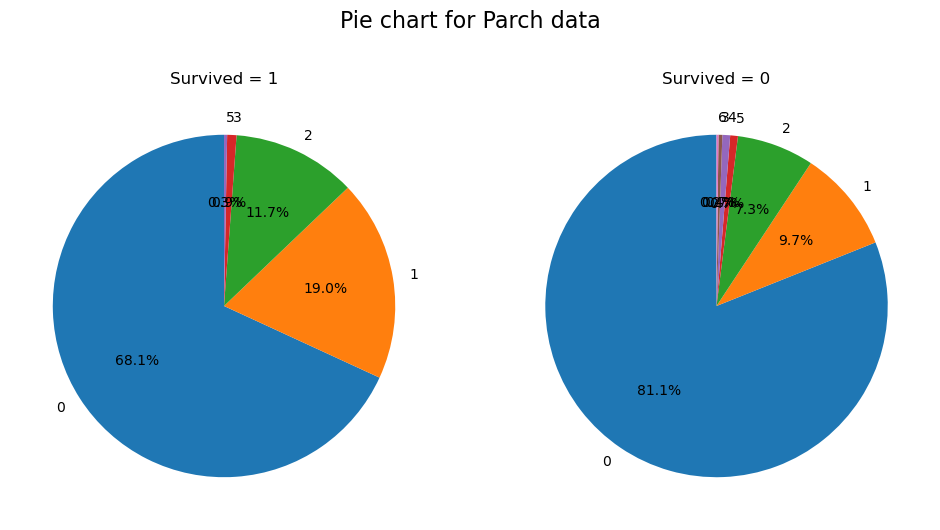

In [14]:
pie_chart(df=train_data, feature='Parch', output='Survived')

In [15]:
get_survived_counts(df=train_data, feature='Parch', output='Survived')

{0: 233, 1: 65, 2: 40, 3: 3, 5: 1}

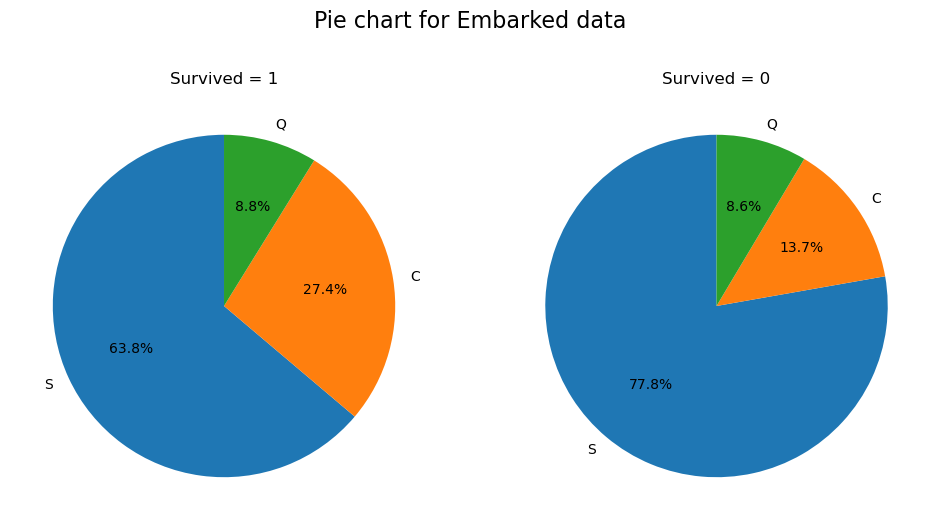

In [16]:
pie_chart(df=train_data, feature='Embarked', output='Survived')

In [17]:
get_survived_counts(df=train_data, feature='Embarked', output='Survived')

{'S': 217, 'C': 93, 'Q': 30}

## FE

In [18]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
train_data['Sex'].unique(), test_data['Sex'].unique()

(array(['male', 'female'], dtype=object),
 array(['male', 'female'], dtype=object))

In [20]:
gender_map ={'male':1, 'female':0}

In [21]:
train_data['Sex'] = train_data['Sex'].map(gender_map)
test_data['Sex'] = test_data['Sex'].map(gender_map)

In [22]:
train_data['Embarked'].isnull().sum(), test_data['Embarked'].isnull().sum()

(2, 0)

In [23]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [25]:
train_data['Embarked'].unique(), test_data['Embarked'].unique()

(array(['S', 'C', 'Q'], dtype=object), array(['Q', 'S', 'C'], dtype=object))

In [26]:
embarked_map = {'S':1, 'C':2, 'Q':3}

In [27]:
train_data['Embarked'] = train_data['Embarked'].map(embarked_map)
test_data['Embarked'] = test_data['Embarked'].map(embarked_map)

In [28]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [29]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [30]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [31]:
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [32]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [33]:
title_map = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Don':5, 'Rev':5, 'Dr':5, 'Mme':5, 'Ms':5,
       'Major':5, 'Lady':5, 'Sir':5, 'Mlle':5, 'Col':5, 'Capt':5, 'Countess':5,
       'Jonkheer':5}

In [34]:
train_data['Title'] = train_data['Title'].map(title_map)
test_data['Title'] = test_data['Title'].map(title_map)

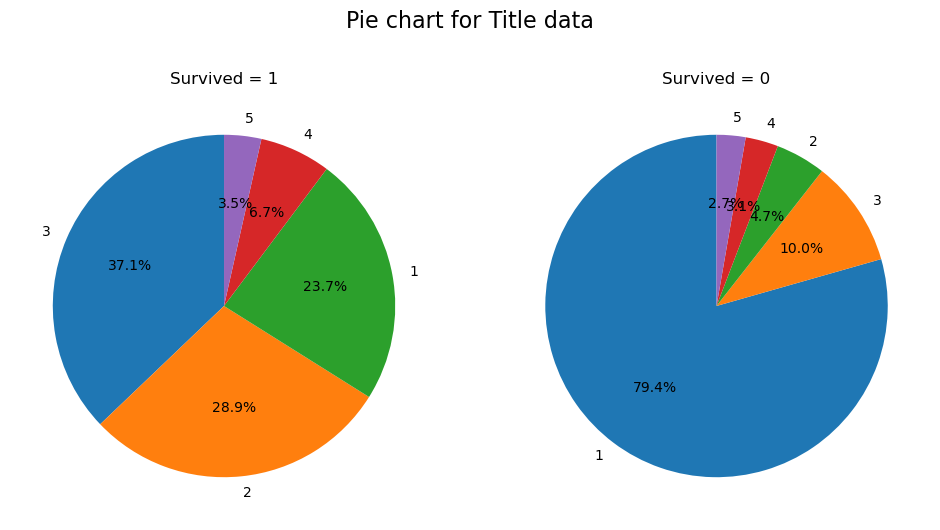

In [35]:
pie_chart(df=train_data, feature='Title', output='Survived')

In [36]:
get_survived_counts(df=train_data, feature='Title', output='Survived')

{3: 127, 2: 99, 1: 81, 4: 23, 5: 12}

In [37]:
train_age_mean = train_data.groupby('Title')['Age'].transform('mean')
train_data['Age'] = train_data['Age'].fillna(train_age_mean)

test_age_mean = test_data.groupby('Title')['Age'].transform('mean')
test_data['Age'] = test_data['Age'].fillna(test_age_mean)

train_data['Age'].isnull().sum(), test_data['Age'].isnull().sum()


(0, 0)

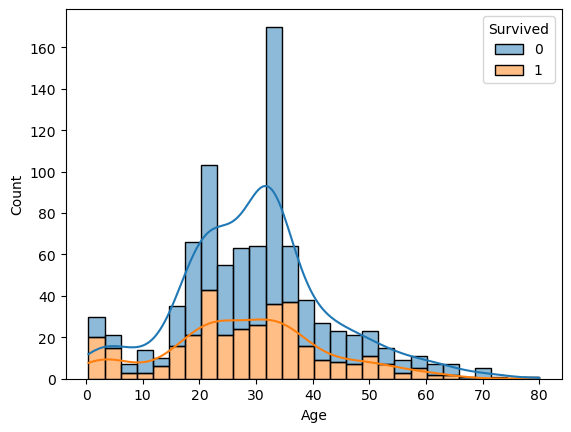

In [38]:
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, multiple='stack')
plt.show()


In [39]:
# For train_data
train_data.loc[train_data['Age'] <= 5, 'Age'] = 0
train_data.loc[(train_data['Age'] > 5) & (train_data['Age'] <= 18), 'Age'] = 1
train_data.loc[(train_data['Age'] > 18) & (train_data['Age'] <= 30), 'Age'] = 2
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 40), 'Age'] = 3
train_data.loc[(train_data['Age'] > 40) & (train_data['Age'] <= 60), 'Age'] = 4
train_data.loc[train_data['Age'] > 60, 'Age'] = 5

# For test_data
test_data.loc[test_data['Age'] <= 5, 'Age'] = 0
test_data.loc[(test_data['Age'] > 5) & (test_data['Age'] <= 18), 'Age'] = 1
test_data.loc[(test_data['Age'] > 18) & (test_data['Age'] <= 30), 'Age'] = 2
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 40), 'Age'] = 3
test_data.loc[(test_data['Age'] > 40) & (test_data['Age'] <= 60), 'Age'] = 4
test_data.loc[test_data['Age'] > 60, 'Age'] = 5



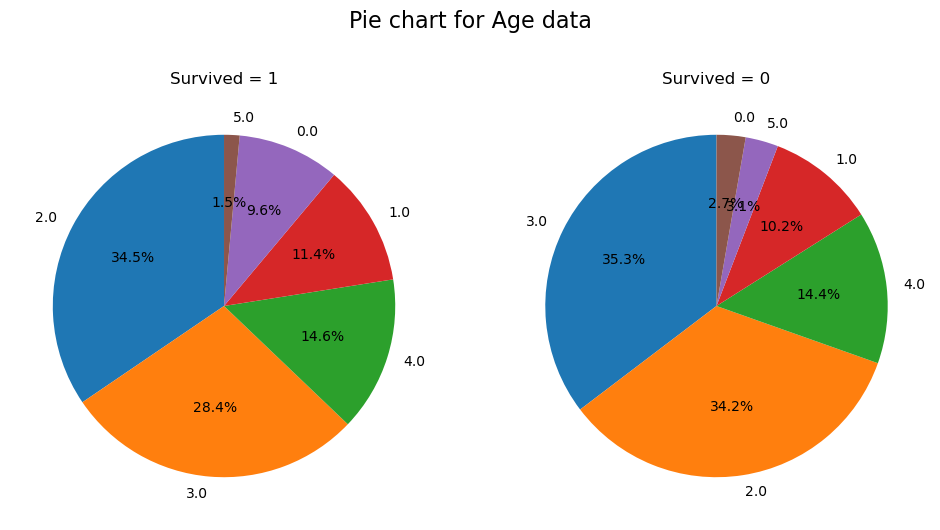

In [40]:
pie_chart(df=train_data, feature='Age', output='Survived')

In [41]:
get_survived_counts(df=train_data, feature='Age', output='Survived')

{2.0: 118, 3.0: 97, 4.0: 50, 1.0: 39, 0.0: 33, 5.0: 5}

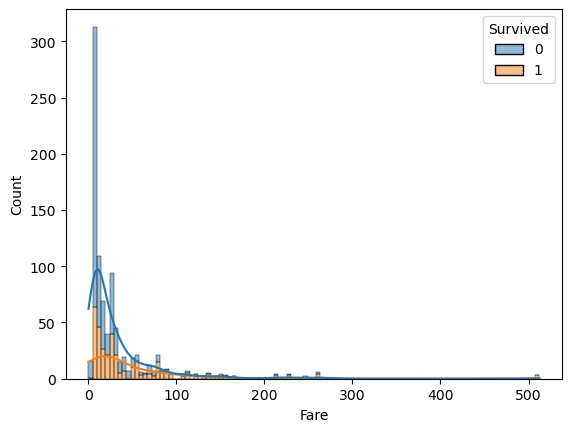

In [42]:
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, multiple='stack')
plt.show()


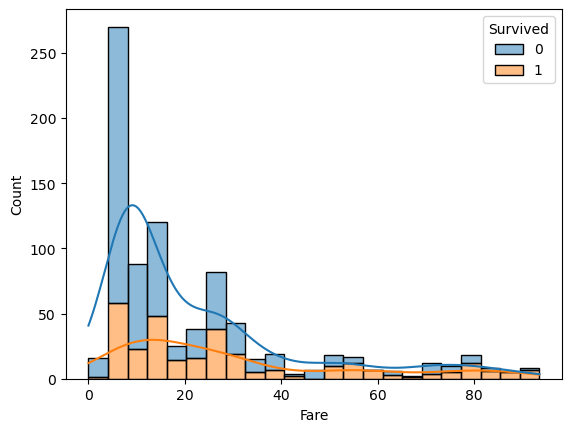

In [43]:
sns.histplot(data=train_data[train_data['Fare']<=100], x='Fare', hue='Survived', kde=True, multiple='stack')
plt.show()


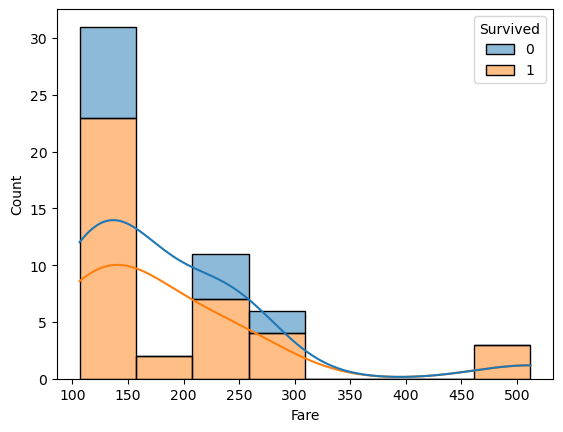

In [44]:
sns.histplot(data=train_data[train_data['Fare']>100], x='Fare', hue='Survived', kde=True, multiple='stack')
plt.show()


In [45]:
# For train_data
train_data.loc[train_data['Fare'] <= 16, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 16) & (train_data['Fare'] <= 40), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 40) & (train_data['Fare'] <= 100), 'Fare'] = 2
train_data.loc[train_data['Fare'] > 100, 'Fare'] = 3

# For test_data
test_data.loc[test_data['Fare'] <= 16, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 16) & (test_data['Fare'] <= 40), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 40) & (test_data['Fare'] <= 100), 'Fare'] = 2
test_data.loc[test_data['Fare'] > 100, 'Fare'] = 3


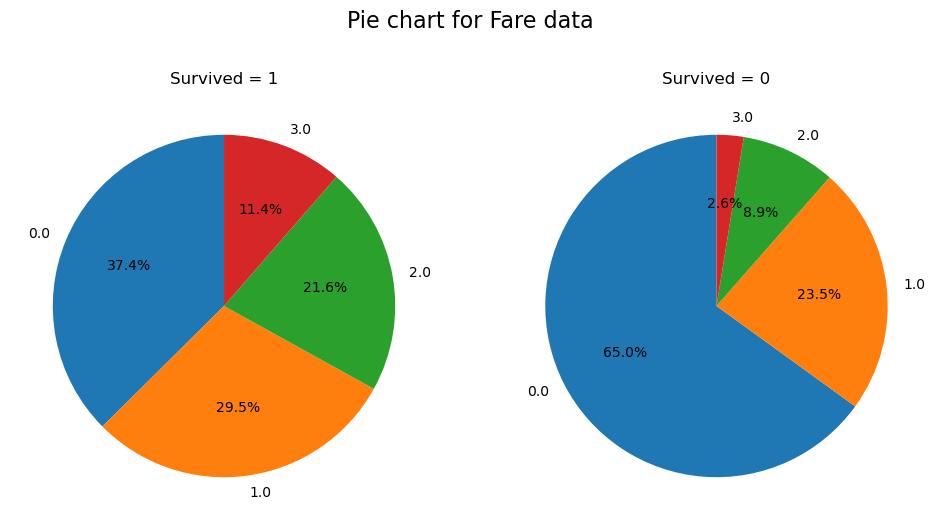

In [46]:
pie_chart(df=train_data, feature='Fare', output='Survived')

In [47]:
get_survived_counts(df=train_data, feature='Fare', output='Survived')

{0.0: 128, 1.0: 101, 2.0: 74, 3.0: 39}

In [48]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,2.0,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,0.0,NaN,1,3


In [49]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [50]:
train_data['TotalFamilyMembers'] = train_data['Parch'] + train_data['SibSp']
test_data['TotalFamilyMembers'] = test_data['Parch'] + test_data['SibSp']

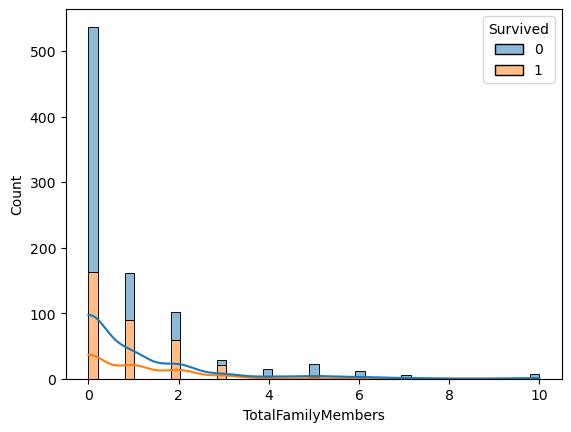

In [51]:
sns.histplot(data=train_data, x='TotalFamilyMembers', hue='Survived', kde=True, multiple='stack')
plt.show()


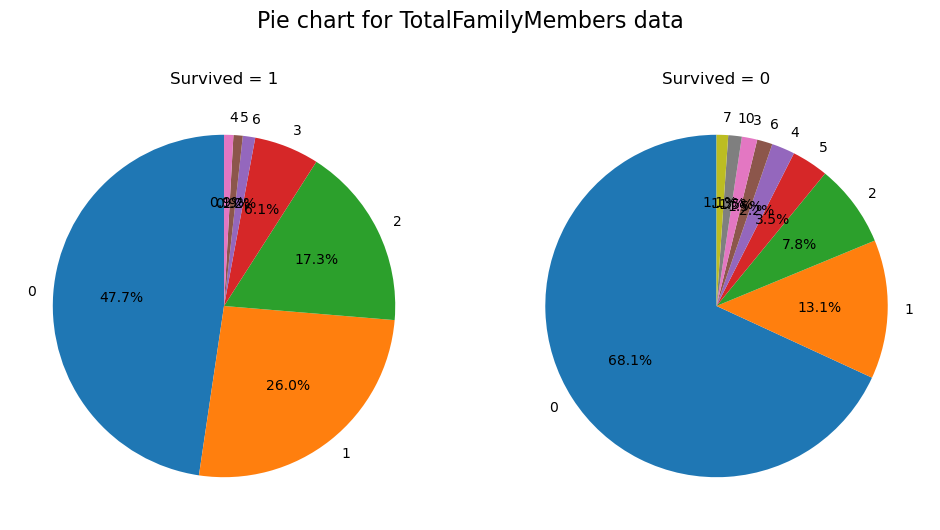

In [52]:
pie_chart(df=train_data, feature='TotalFamilyMembers', output='Survived')

In [53]:
get_survived_counts(df=train_data, feature='TotalFamilyMembers', output='Survived')

{0: 163, 1: 89, 2: 59, 3: 21, 6: 4, 5: 3, 4: 3}

In [54]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

train_data['Cabin'].unique(), test_data['Cabin'].unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [55]:
cabin_map = {'C':2, 'E':4, 'G':6, 'D':3, 'A':0, 'B':1, 'F':5, 'T':7}

In [56]:
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

In [57]:

train_data['Cabin'].fillna(train_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)

test_data['Cabin'].fillna(test_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)


C:\Users\Durjay\AppData\Local\Temp\ipykernel_35332\1260726222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna(train_data.groupby(['Pclass'])['Cabin'].transform('median'), inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_35332\1260726222.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [58]:
train_data['Cabin'].isnull().sum(), test_data['Cabin'].isnull().sum()

(0, 0)

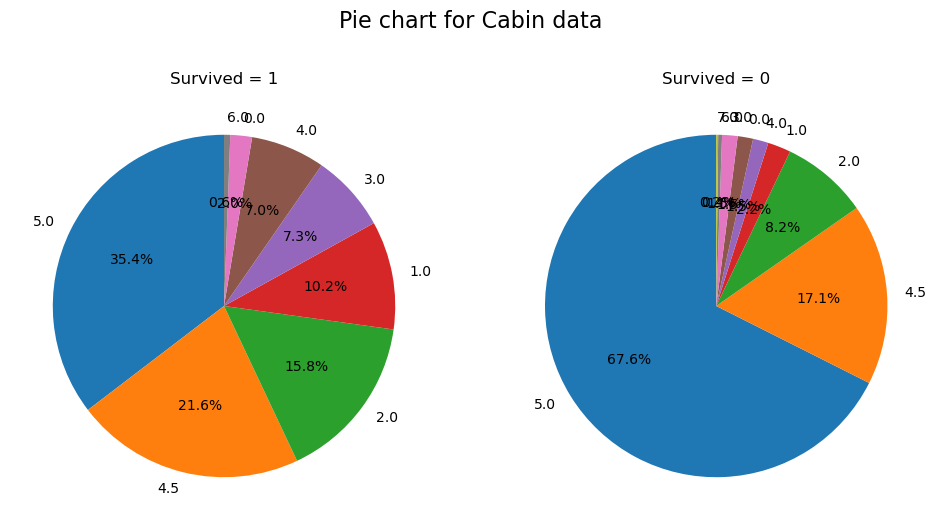

In [59]:
pie_chart(df=train_data, feature='Cabin', output='Survived')

In [60]:
get_survived_counts(df=train_data, feature='Cabin', output='Survived')

{5.0: 121, 4.5: 74, 2.0: 54, 1.0: 35, 3.0: 25, 4.0: 24, 0.0: 7, 6.0: 2}

In [61]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TotalFamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,5.0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,2.0,2.0,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,0.0,5.0,1,3,0


In [62]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TotalFamilyMembers
0,892,3,"Kelly, Mr. James",1,3.0,0,0,330911,0.0,5.0,3,1.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,4.0,1,0,363272,0.0,5.0,1,2.0,1
2,894,2,"Myles, Mr. Thomas Francis",1,5.0,0,0,240276,0.0,5.0,3,1.0,0


In [63]:
train_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], inplace=True)
test_data.drop(columns=['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], inplace=True)

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Sex                 891 non-null    int64  
 3   Age                 891 non-null    float64
 4   Fare                891 non-null    float64
 5   Cabin               891 non-null    float64
 6   Embarked            891 non-null    int64  
 7   Title               891 non-null    int64  
 8   TotalFamilyMembers  891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Sex                 418 non-null    int64  
 2   Age                 418 non-null    float64
 3   Fare                417 non-null    float64
 4   Cabin               418 non-null    float64
 5   Embarked            418 non-null    int64  
 6   Title               417 non-null    float64
 7   TotalFamilyMembers  418 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.3 KB


In [66]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Title'].fillna(1, inplace=True)

C:\Users\Durjay\AppData\Local\Temp\ipykernel_35332\1680874162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_35332\1680874162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [67]:
y_train = train_data['Survived']
x_train = train_data.drop(columns='Survived')

x_test = test_data
y_test = submission_data['Survived']

In [68]:
x_train.shape, y_train.shape

((891, 8), (891,))

In [69]:
x_test.shape, y_test.shape

((418, 8), (418,))

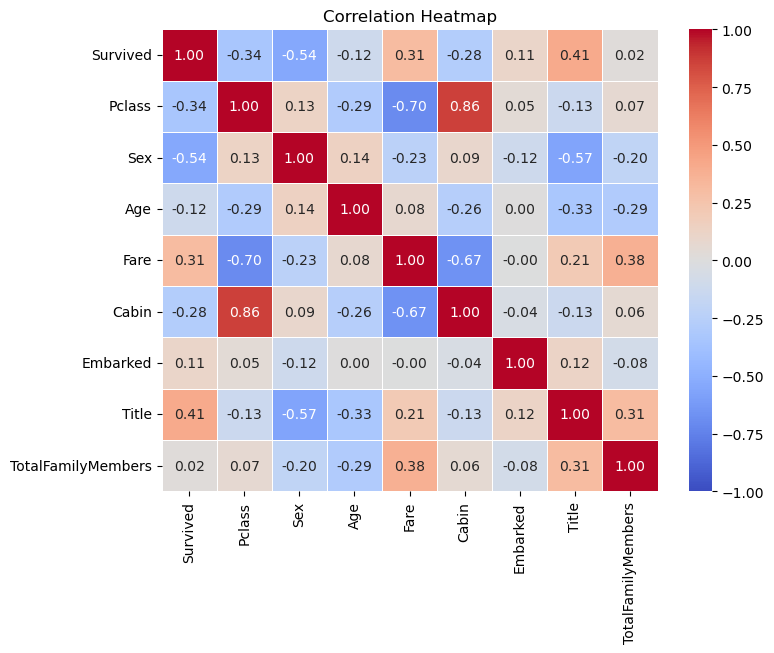

In [96]:
# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['int', 'float'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [72]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr.score(x_test, y_test)*100, lr.score(x_train, y_train)*100

(91.38755980861244, 80.69584736251403)

In [73]:
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    print(dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100, i)

93.54066985645933 78.22671156004489 1
93.0622009569378 81.70594837261504 2
90.66985645933015 82.49158249158249 3
92.58373205741627 83.72615039281706 4
85.88516746411483 84.73625140291807 5
81.3397129186603 85.97081930415264 6
88.03827751196172 87.42985409652077 7
85.64593301435407 88.66442199775533 8
85.64593301435407 89.22558922558923 9
85.4066985645933 89.67452300785635 10
85.64593301435407 90.01122334455668 11
83.97129186602871 90.12345679012346 12
83.73205741626795 90.46015712682379 13
83.01435406698565 90.79685746352413 14
83.25358851674642 90.79685746352413 15
83.01435406698565 90.79685746352413 16
83.25358851674642 90.79685746352413 17
83.01435406698565 90.79685746352413 18
83.25358851674642 90.79685746352413 19


In [74]:
sv = SVC(kernel='linear')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(100.0, 78.67564534231201)

In [75]:
sv = SVC(kernel='poly')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(95.93301435406698, 83.27721661054994)

In [76]:
sv = SVC(kernel='rbf')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(94.01913875598086, 83.38945005611671)

In [77]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn.score(x_test, y_test)*100, knn.score(x_train, y_train)*100

(87.5598086124402, 86.08305274971941)

In [78]:
gb = GaussianNB()
gb.fit(x_train, y_train)

gb.score(x_test, y_test)*100, gb.score(x_train, y_train)*100

(84.44976076555024, 77.55331088664423)

### Hyper Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
df= {'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [i for i in range(2,20)]}

In [81]:
gd = GridSearchCV(DecisionTreeClassifier(), param_grid=df, cv=5)
gd.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [82]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [83]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')
dt.fit(x_train,y_train)

dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(92.58373205741627, 83.72615039281706)

In [84]:
output = submission_data.copy()

output['Survived'] = dt.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 92.58%


In [85]:

output.to_csv('submission.csv', index=False)


#### Since this model was Under fitted, fixing the Underfitting

In [86]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)
dt.score(x_test, y_test)*100, dt.score(x_train, y_train)*100

(87.79904306220095, 87.42985409652077)

In [87]:
output = submission_data.copy()

output['Survived'] = dt.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 87.80%


In [88]:

# Save the output DataFrame to a CSV file
#output.to_csv('submission_4.csv', index=False)


In [89]:
sv = SVC(kernel='linear')
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(100.0, 78.67564534231201)

In [90]:
output = submission_data.copy()

output['Survived'] = sv.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 100.00%


In [91]:
sv = SVC(kernel='rbf', shrinking=True,gamma='auto', C=1)
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(93.54066985645933, 83.61391694725027)

In [92]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier with default parameters
rf = RandomForestClassifier(random_state=64)

# Train the model
rf.fit(x_train, y_train)

# Get accuracy scores
train_accuracy = rf.score(x_train, y_train) * 100
test_accuracy = rf.score(x_test, y_test) * 100
train_accuracy, test_accuracy


(90.79685746352413, 86.60287081339713)

In [93]:
sv = SVC(kernel='rbf', shrinking=True,gamma='auto', C=1)
sv.fit(x_train, y_train)

sv.score(x_test, y_test)*100, sv.score(x_train, y_train)*100

(93.54066985645933, 83.61391694725027)

In [94]:
output = submission_data.copy()

output['Survived'] = sv.predict(x_test)

correct_predictions = (output['Survived'] == submission_data['Survived']).sum()

accuracy = correct_predictions / len(submission_data) * 100

print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 93.54%


In [95]:
output.to_csv('submission_6.csv', index=False)